# Task: Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.

## Visualize the population distribution across the top 10 most populous countries for a given year. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_84031.csv', skiprows=4)

In [3]:
# Select a year to visualize. 
year = '2020'

In [4]:
# Creating a smaller DataFrame with only relevant columns for easier handling
population_data = data[['Country Name', year]]

# Drop NaN values to clean up the data for visualization
population_data = population_data.dropna()

# Convert the year column to integers as it might be read as strings
population_data[year] = population_data[year].astype(int)

# Sort the data based on population to better visualize in the plot
population_data = population_data.sort_values(by=year, ascending=False)
top_population_data = population_data.head(10)

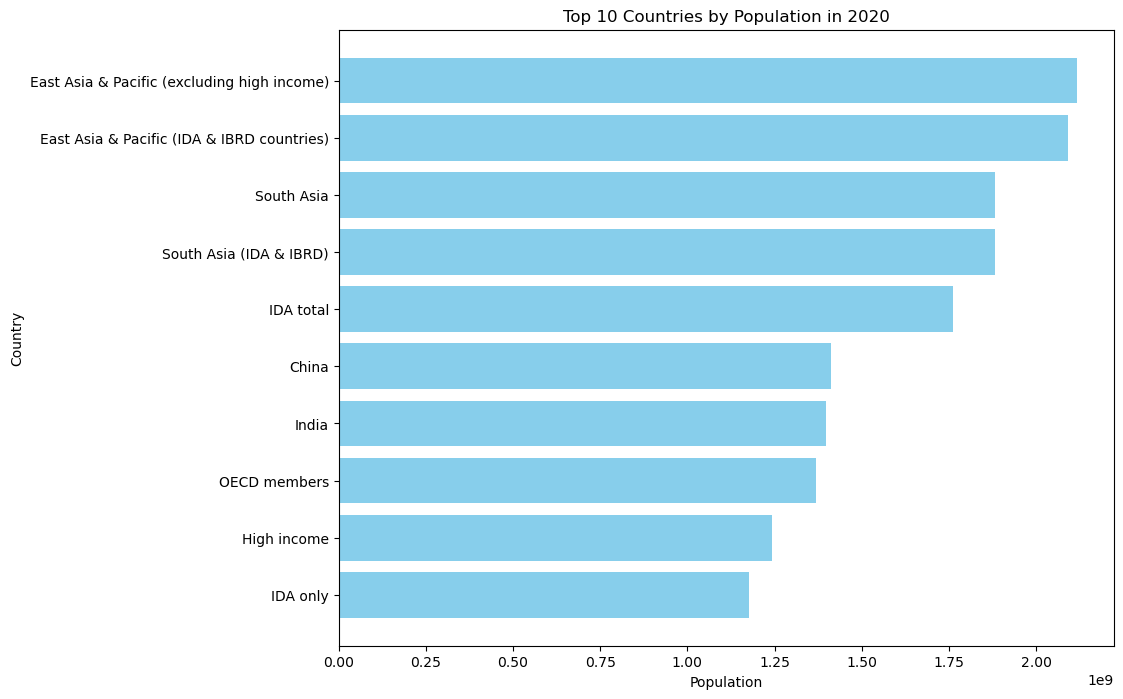

In [5]:
plt.figure(figsize=(10, 8))
plt.barh(top_population_data['Country Name'], top_population_data[year], color='skyblue')
plt.xlabel('Population')
plt.ylabel('Country')
plt.title(f'Top 10 Countries by Population in {year}')
plt.gca().invert_yaxis()  # Invert y-axis to have the country with the highest population at the top
plt.show()

## Trend Analysis Over Time for a Selected Country

In [6]:
# Selecting the country (e.g., India)
india_population = data[data['Country Name'] == 'India']

# Taking only the year columns
years = india_population.loc[:, '1960':'2023'].columns
populations = india_population.loc[:, '1960':'2023'].values.flatten()

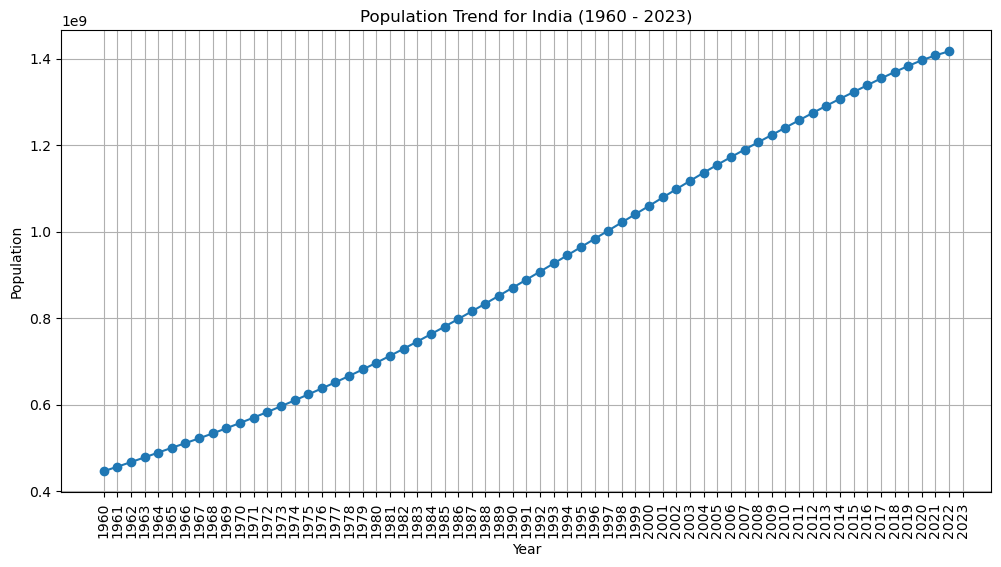

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(years, populations, marker='o')
plt.title('Population Trend for India (1960 - 2023)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

## Population Distribution by Region for a Specific Year

In [19]:
metadata_country = pd.read_csv('Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_84031.csv')

# Merge data with country metadata to get region information
merged_data = pd.merge(data, metadata_country, on='Country Code')

In [20]:
# Select year and sum populations by region
year = '2020'
population_by_region = merged_data.groupby('Region')[year].sum().dropna()

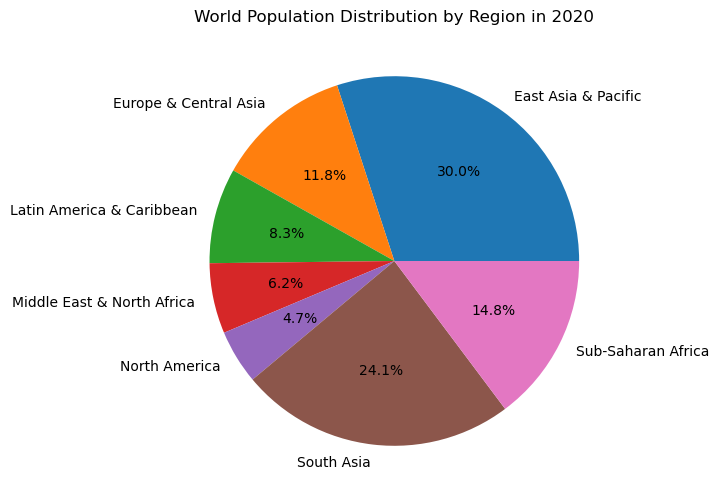

In [21]:
plt.figure(figsize=(10, 6))
population_by_region.plot(kind='pie', autopct='%1.1f%%')
plt.title(f'World Population Distribution by Region in {year}')
plt.ylabel('')  # Hide the y-label as it's unnecessary for pie charts
plt.show()

## Comparative Population Trends of Multiple Countries Over Time

In [22]:
countries = ['India', 'China', 'United States', 'Brazil', 'South Africa']

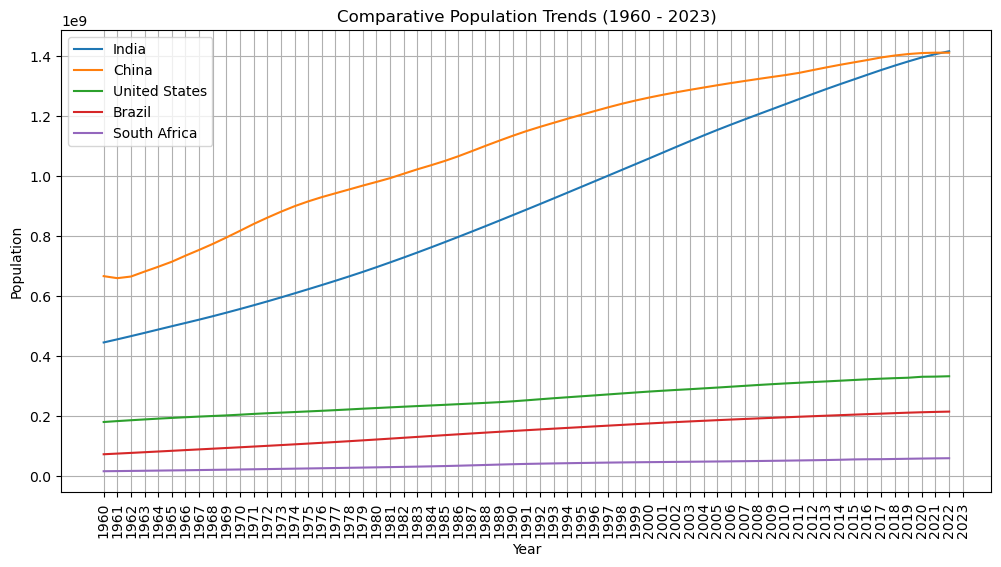

In [24]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = data[data['Country Name'] == country]
    plt.plot(country_data.loc[:, '1960':'2023'].columns, country_data.loc[:, '1960':'2023'].values.flatten(), label=country)

plt.title('Comparative Population Trends (1960 - 2023)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()